In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import os 
path = os.getcwd()
print(path)
plt.style.use('fivethirtyeight')

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_11


In [2]:
# convert retail clean to monthly time series of total sales per month

In [2]:
retail_clean = pd.read_csv("{0}/retail_clean.csv".format(path))

In [3]:
retail_clean.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [4]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [5]:
#convert InvoiceDate to datetime
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])

In [6]:
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime("%Y-%m-%d")

In [7]:
retail_clean['date'] = pd.to_datetime(retail_clean['date'])

In [8]:
retail_clean['year'] = retail_clean.date.dt.year
retail_clean['month'] = retail_clean.date.dt.month
retail_clean['week'] = retail_clean.date.dt.week

ipykernel_launcher:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [9]:
retail_clean.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date',
       'year', 'month', 'week'],
      dtype='object')

In [13]:
retail_clean.describe()

,Unnamed: 0,Invoice,Quantity,Price,Customer ID,Revenue,year,month,week
count,7.794950e+05,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000
mean,5.315660e+05,537427.005391,13.507085,3.218199,15320.262918,22.289821,2010.432050,7.417110,30.126300
std,3.110433e+05,26901.961110,146.540284,29.674823,1695.722988,227.416962,0.568394,3.422346,14.840159
min,0.000000e+00,489434.000000,1.000000,0.000000,12346.000000,0.000000,2009.000000,1.000000,1.000000
25%,2.598405e+05,514483.000000,2.000000,1.250000,13971.000000,4.950000,2010.000000,5.000000,18.000000
50%,5.071680e+05,536754.000000,6.000000,1.950000,15246.000000,12.480000,2010.000000,8.000000,33.000000
75%,8.114895e+05,562002.000000,12.000000,3.750000,16794.000000,19.800000,2011.000000,11.000000,44.000000
max,1.067370e+06,581587.000000,80995.000000,10953.500000,18287.000000,168469.600000,2011.000000,12.000000,52.000000


In [14]:
time_series = retail_clean.groupby(['week', 'month', 'year']).agg(date=('date', 'first'), total_sales=('Quantity', np.sum)).reset_index().sort_values('date')

In [15]:
time_series.head()

,week,month,year,date,total_sales
113,49,12,2009,2009-12-01,138612
116,50,12,2009,2009-12-07,109644
118,51,12,2009,2009-12-14,125772
120,52,12,2009,2009-12-21,24680
0,1,1,2010,2010-01-04,95950


In [18]:
time_series = time_series.set_index('date')

In [19]:
monthly_series = time_series.total_sales.resample('M').sum()

In [20]:
monthly_series

date
2009-12-31    398708
2010-01-31    370128
2010-02-28    371871
2010-03-31    502101
2010-04-30    350604
2010-05-31    384960
2010-06-30    389880
2010-07-31    324638
2010-08-31    452551
2010-09-30    567806
2010-10-31    596497
2010-11-30    653074
2010-12-31    311063
2011-01-31    348522
2011-02-28    265043
2011-03-31    347623
2011-04-30    291369
2011-05-31    372948
2011-06-30    363014
2011-07-31    367372
2011-08-31    398190
2011-09-30    543654
2011-10-31    591551
2011-11-30    678760
2011-12-31    286778
Freq: M, Name: total_sales, dtype: int64

<AxesSubplot:xlabel='date'>

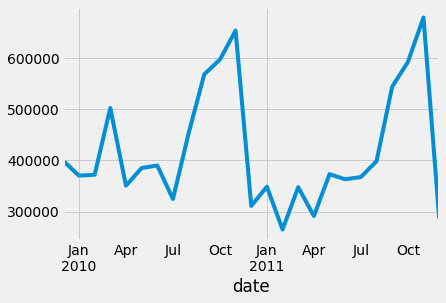

In [21]:
monthly_series.plot()

In [22]:
# 2.Make a plot for the trend, seasonality and the remainder

In [23]:
from pylab import rcParams

In [24]:
rcParams['figure.figsize'] = 16,8

In [25]:
components = sm.tsa.seasonal_decompose(monthly_series)

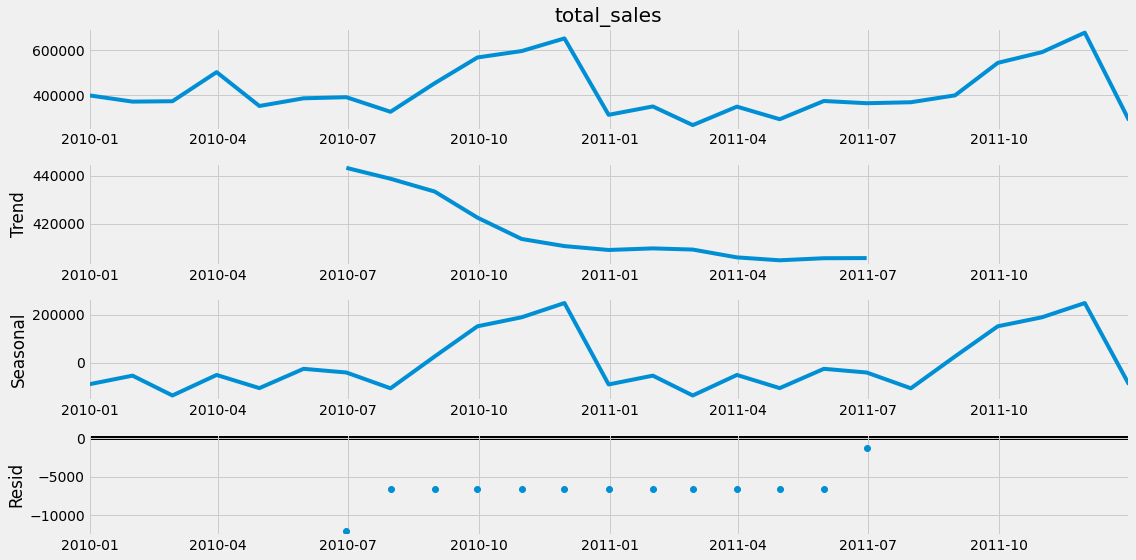

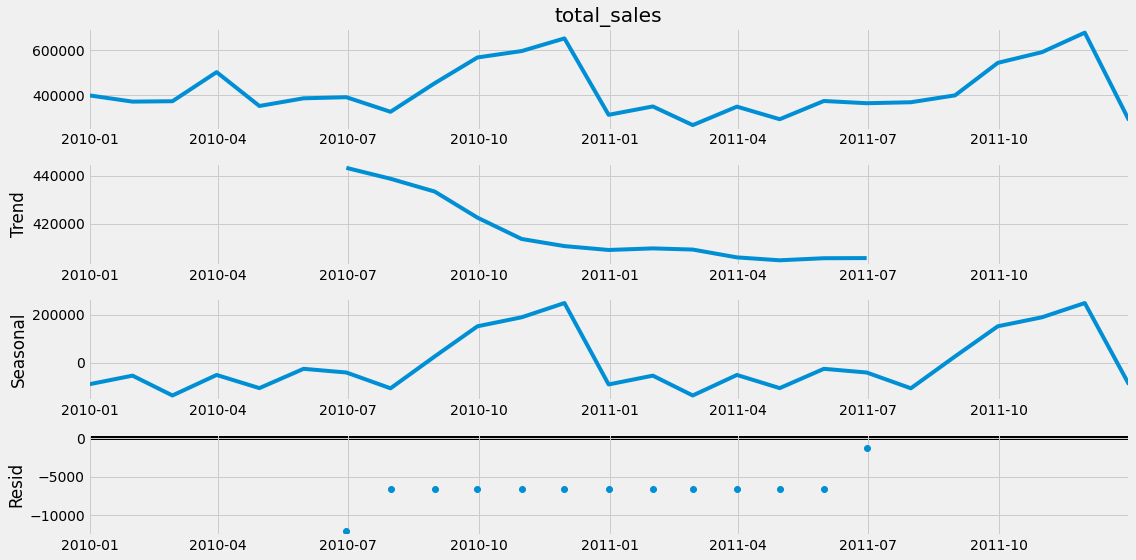

In [27]:
components.plot()

In [30]:
trend = components.trend
print(trend)

date
2009-12-31              NaN
2010-01-31              NaN
2010-02-28              NaN
2010-03-31              NaN
2010-04-30              NaN
2010-05-31              NaN
2010-06-30    443249.625000
2010-07-31    438697.500000
2010-08-31    433346.083333
2010-09-30    422458.333333
2010-10-31    413553.625000
2010-11-30    410585.000000
2010-12-31    408965.083333
2011-01-31    409626.250000
2011-02-28    409141.791667
2011-03-31    405870.416667
2011-04-30    404658.000000
2011-05-31    405522.166667
2011-06-30    405580.541667
2011-07-31              NaN
2011-08-31              NaN
2011-09-30              NaN
2011-10-31              NaN
2011-11-30              NaN
2011-12-31              NaN
Freq: M, Name: trend, dtype: float64


In [31]:
seasonality = components.seasonal
print(seasonality)

date
2009-12-31    -91297.222222
2010-01-31    -54499.388889
2010-02-28   -137493.930556
2010-03-31    -51642.555556
2010-04-30   -106684.138889
2010-05-31    -25969.305556
2010-06-30    -41363.222222
2010-07-31   -107454.638889
2010-08-31     25809.777778
2010-09-30    151952.527778
2010-10-31    189548.236111
2010-11-30    249093.861111
2010-12-31    -91297.222222
2011-01-31    -54499.388889
2011-02-28   -137493.930556
2011-03-31    -51642.555556
2011-04-30   -106684.138889
2011-05-31    -25969.305556
2011-06-30    -41363.222222
2011-07-31   -107454.638889
2011-08-31     25809.777778
2011-09-30    151952.527778
2011-10-31    189548.236111
2011-11-30    249093.861111
2011-12-31    -91297.222222
Freq: M, Name: seasonal, dtype: float64


In [32]:
remainder = components.resid
print(remainder)

date
2009-12-31             NaN
2010-01-31             NaN
2010-02-28             NaN
2010-03-31             NaN
2010-04-30             NaN
2010-05-31             NaN
2010-06-30   -12006.402778
2010-07-31    -6604.861111
2010-08-31    -6604.861111
2010-09-30    -6604.861111
2010-10-31    -6604.861111
2010-11-30    -6604.861111
2010-12-31    -6604.861111
2011-01-31    -6604.861111
2011-02-28    -6604.861111
2011-03-31    -6604.861111
2011-04-30    -6604.861111
2011-05-31    -6604.861111
2011-06-30    -1203.319444
2011-07-31             NaN
2011-08-31             NaN
2011-09-30             NaN
2011-10-31             NaN
2011-11-30             NaN
2011-12-31             NaN
Freq: M, Name: resid, dtype: float64


<AxesSubplot:xlabel='date'>

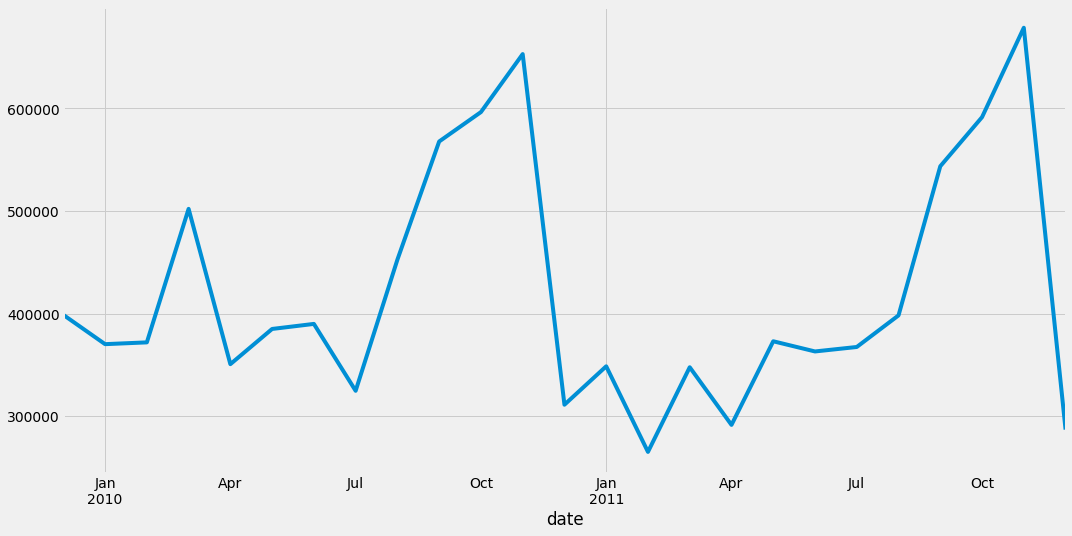

In [33]:
monthly_series.plot()

<AxesSubplot:xlabel='date'>

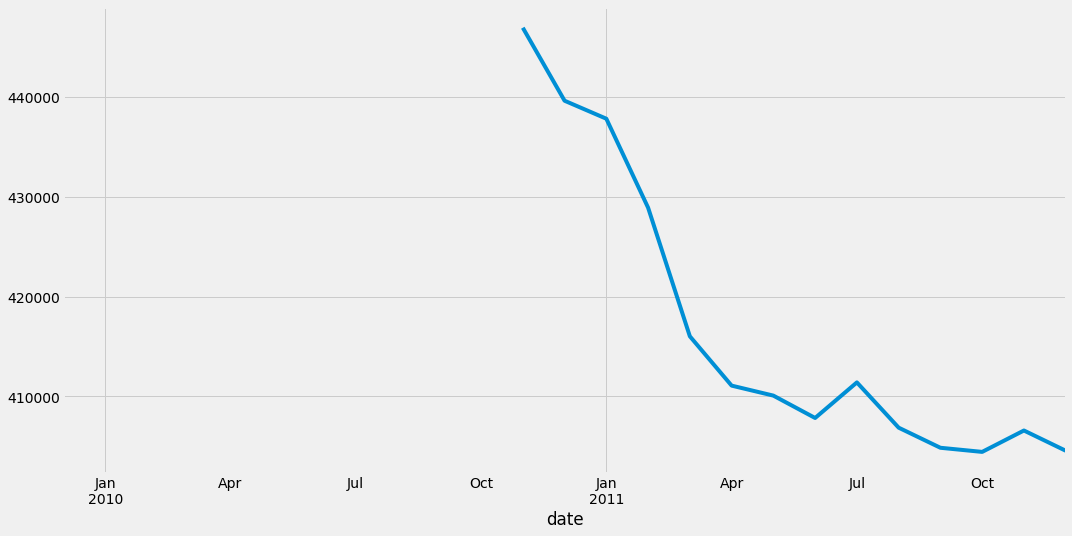

In [34]:
monthly_series.rolling(window=12).mean().plot()

<AxesSubplot:xlabel='date'>

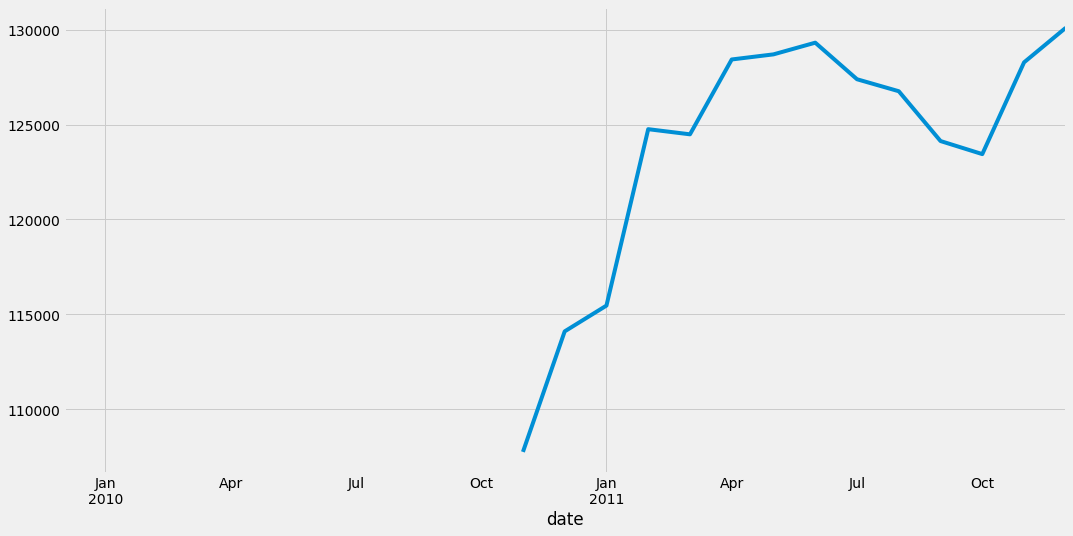

In [35]:
monthly_series.rolling(window=12).std().plot()

In [36]:
ad_fuller_test= sm.tsa.stattools.adfuller(monthly_series,autolag='AIC')
ad_fuller_test

(-3.356898142962889,
 0.012518958188462888,
 2,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 397.22710967925735)

In [37]:
# 3 Fit the time  series to a moving average model, what is the AIC

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [41]:
monthly_series

date
2009-12-31    398708
2010-01-31    370128
2010-02-28    371871
2010-03-31    502101
2010-04-30    350604
2010-05-31    384960
2010-06-30    389880
2010-07-31    324638
2010-08-31    452551
2010-09-30    567806
2010-10-31    596497
2010-11-30    653074
2010-12-31    311063
2011-01-31    348522
2011-02-28    265043
2011-03-31    347623
2011-04-30    291369
2011-05-31    372948
2011-06-30    363014
2011-07-31    367372
2011-08-31    398190
2011-09-30    543654
2011-10-31    591551
2011-11-30    678760
2011-12-31    286778
Freq: M, Name: total_sales, dtype: int64

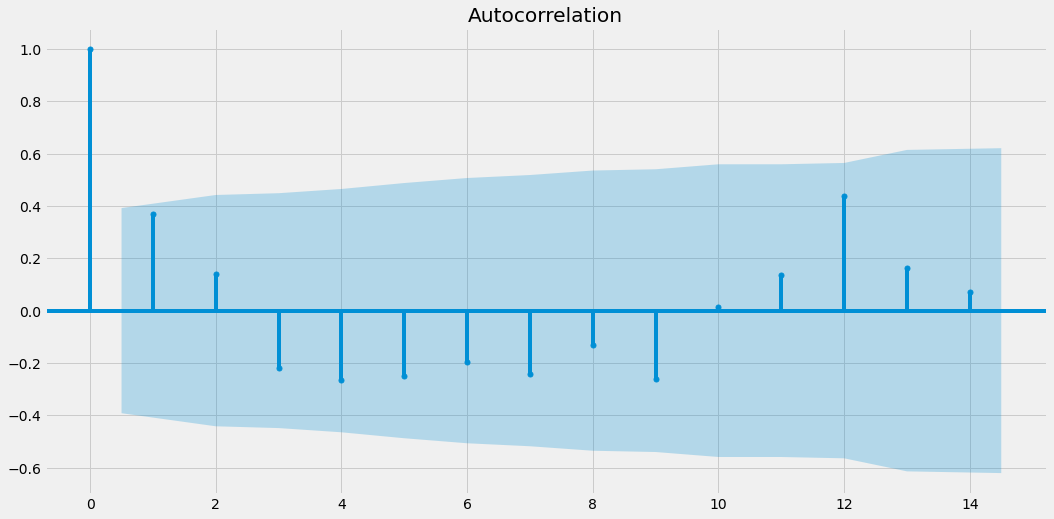

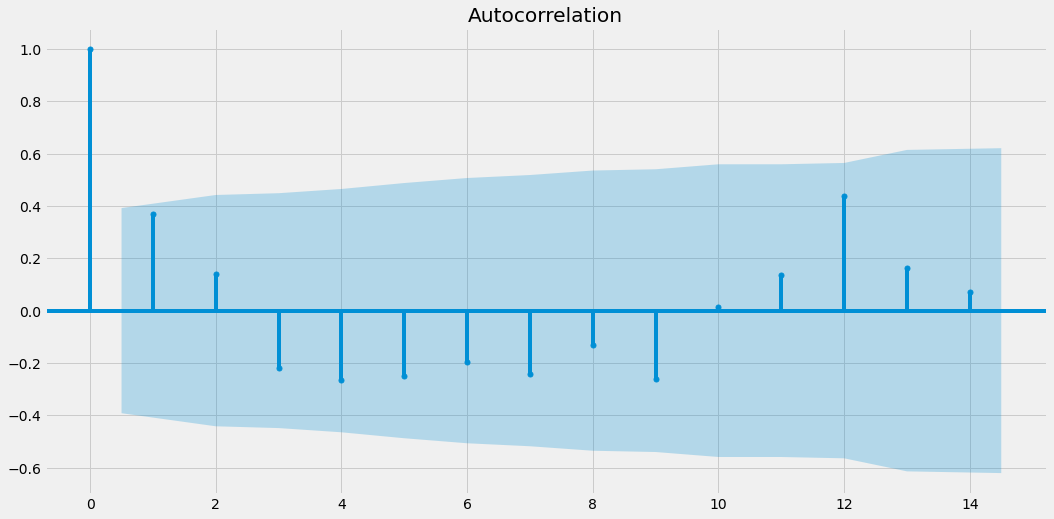

In [39]:
plot_acf(monthly_series)

In [40]:
plot_pacf(monthly_series)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 12.

In [ ]:
# 4. Fit the time series to an AR model, what is the AIC

In [47]:
model_ma = sm.tsa.statespace.SARIMAX(monthly_series, order=(0,0,1))
result_ma = model_ma.fit()
result_ma.aic

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


708.0230586495467

In [48]:
model_AR = sm.tsa.statespace.SARIMAX(monthly_series, order=(1,0,0))
result_AR = model_AR.fit()
result_AR.aic

665.3244111102928

In [50]:
model_ARma = sm.tsa.statespace.SARIMAX(monthly_series, order=(1,0,1))
result_ARma = model_ARma.fit()
result_ARma.aic

666.2593950268359

In [ ]:
# 5.Fit the time series to an ARIMA model, what is the AIC

In [51]:
model_ARima = sm.tsa.statespace.SARIMAX(monthly_series, order=(1,1,1))
result_ARima = model_ARima.fit()
result_ARima.aic

638.1114103614034

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


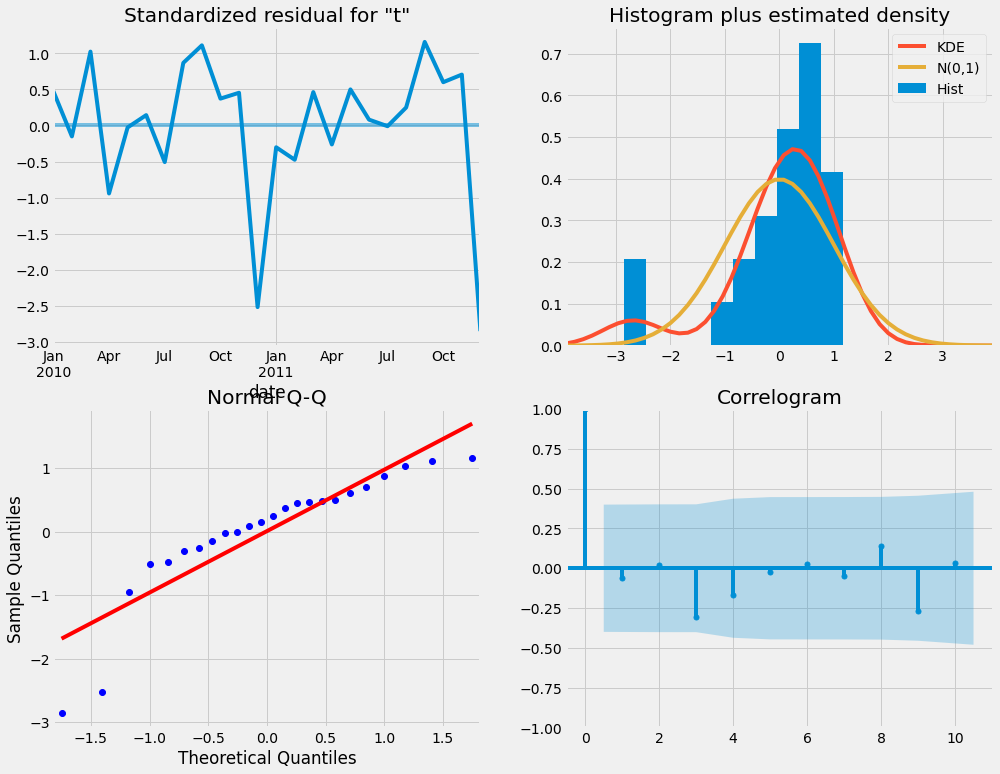

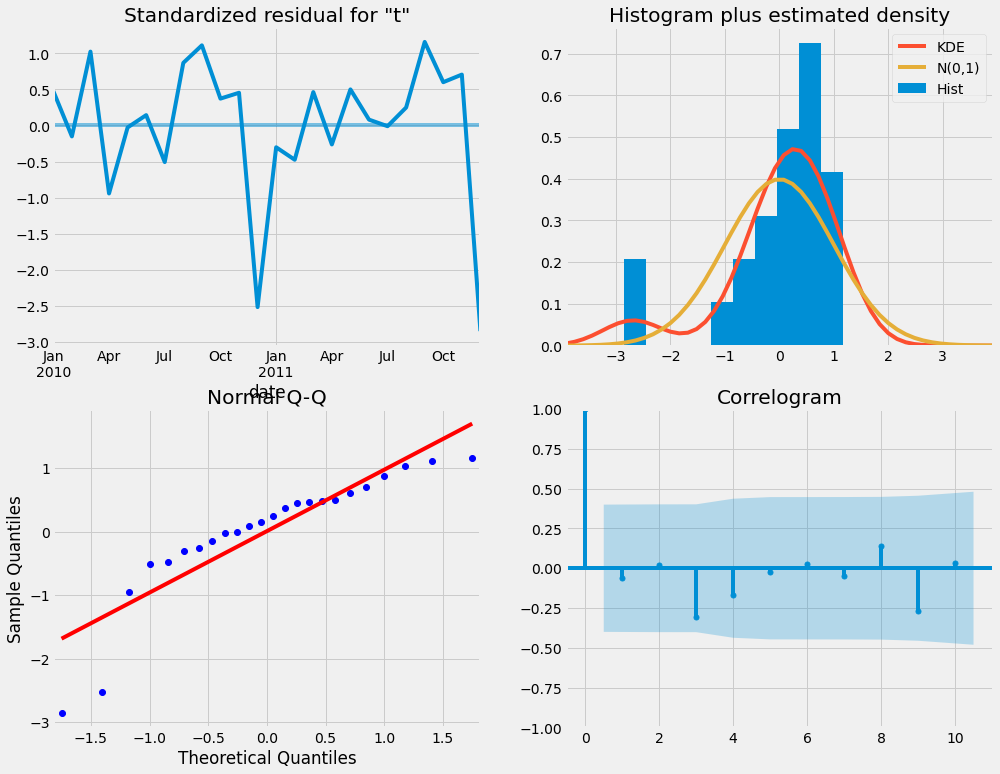

In [53]:
result_ARima.plot_diagnostics(figsize=(15, 12))

In [54]:
# 6. Do a search on the SARIMA component using itertools